<a href="https://colab.research.google.com/github/ricardo-kowalski/notebooks/blob/master/AULA2_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 2 - ATIVIDADE 1 PCA - RICARDO

## PASSO 0 : Importando as bibliotecas e lendo os dados de entrada ##

In [15]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

#np.set_printoptions(suppress=True)  #suprimir notação cientifica se necessário

df = pd.read_csv("diabetes.csv")

df= df.astype(float) #evita mensagens de erro 

df = df.drop(['Outcome'], axis = 1)  #desconsidera a última coluna

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,627.0,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,351.0,31.0
2,8.0,183.0,64.0,0.0,0.0,23.3,672.0,32.0
3,1.0,89.0,66.0,23.0,94.0,28.1,167.0,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2288.0,33.0


In [16]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,428.235091,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,340.485655,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,205.000000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,337.000000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,591.500000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2329.000000,81.000000


## PASSO 1: Normalizando os dados de entrada ##

### Padronização   ( X - μ ) / σ

In [17]:
df = (df - df.mean())/df.std()

df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.583769,1.425067
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.226838,-0.190548
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.715933,-0.105515
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.767243,-1.040871
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.462095,-0.020483
5,0.342757,-0.153085,0.252871,-1.287373,-0.692439,-0.810813,-0.667385,-0.275580
6,-0.250789,-1.341602,-0.987066,0.718617,0.071158,-0.125895,-0.529347,-0.615709
7,1.826623,-0.184362,-3.570271,-1.287373,-0.692439,0.419502,-0.864163,-0.360612
8,-0.547562,2.380333,0.046215,1.533551,4.019303,-0.189314,-0.793675,1.680164
9,1.233077,0.128406,1.389481,-1.287373,-0.692439,-4.057829,-0.576339,1.765196


## PASSO 2: Calculando a matriz de covariância ##

In [19]:
df_cov = np.cov(np.transpose(df))    #calcula a matriz de covariância, df de ser transposta pois a função cov associa os valores às colunas e descrições às linhas

df_cov

array([[ 1.        ,  0.12945867,  0.14128198, -0.08167177, -0.07353461,
         0.01768309, -0.02620518,  0.54434123],
       [ 0.12945867,  1.        ,  0.15258959,  0.05732789,  0.33135711,
         0.22107107,  0.13316295,  0.26351432],
       [ 0.14128198,  0.15258959,  1.        ,  0.20737054,  0.08893338,
         0.28180529,  0.05143577,  0.23952795],
       [-0.08167177,  0.05732789,  0.20737054,  1.        ,  0.43678257,
         0.3925732 ,  0.15427391, -0.11397026],
       [-0.07353461,  0.33135711,  0.08893338,  0.43678257,  1.        ,
         0.19785906,  0.18520682, -0.04216295],
       [ 0.01768309,  0.22107107,  0.28180529,  0.3925732 ,  0.19785906,
         1.        ,  0.10357518,  0.03624187],
       [-0.02620518,  0.13316295,  0.05143577,  0.15427391,  0.18520682,
         0.10357518,  1.        ,  0.01796969],
       [ 0.54434123,  0.26351432,  0.23952795, -0.11397026, -0.04216295,
         0.03624187,  0.01796969,  1.        ]])

## PASSO 3: Calcular os Autovetores e Autovalores

### Autovetores e Autovalores Associados

In [20]:
import numpy.linalg as la           # Importa pacote numpy.linalg para efetuar os calculos de autovalores e autovetores

df_w, df_v = la.eig(df_cov)                # Obtém autovalores e autovetores

print ("autovalores: \n", df_w)

print ("\n\nautovetores: \n", df_v)

autovalores: 
 [2.07897348 1.72891966 0.42280373 0.40448332 0.6837714  0.76343037
 0.87631783 1.04130022]


autovetores: 
 [[-0.13831882 -0.59155996 -0.59033121  0.12647625 -0.17652131  0.48103903
  -0.06103119  0.01242583]
 [-0.39875073 -0.16586668 -0.05876751  0.45085901 -0.07892819 -0.47340038
   0.4201647  -0.4470824 ]
 [-0.36896502 -0.1744233  -0.18749438 -0.00803119  0.62469186 -0.3574891
  -0.20101879  0.48966903]
 [-0.43561538  0.33968555  0.28534288  0.56157787  0.00907552  0.4879434
  -0.03242908  0.24256945]
 [-0.43663875  0.26128147 -0.14722949 -0.54699475  0.31386751  0.32418075
   0.32764096 -0.33052116]
 [-0.44952385  0.10761986 -0.04915028 -0.34160208 -0.68626998 -0.23032883
  -0.01033462  0.37830396]
 [-0.24724604  0.11696992 -0.0388835  -0.00380351 -0.04777916 -0.08254465
  -0.8183493  -0.4948424 ]
 [-0.20521722 -0.61903416  0.71124998 -0.22222961  0.02293778  0.11682536
  -0.03355064 -0.06418807]]


In [21]:
ind = np.argsort(df_w)[::-1]  # Obtém índices para ordenação decrescente dos autovalores

w_dec = df_w[ind]

print ('Ordenação decrescente autovalores: \n', w_dec)

v_dec = df_v[ind]

print ('\n\nOrdenação decrescente autovetores: \n', v_dec)

Ordenação decrescente autovalores: 
 [2.07897348 1.72891966 1.04130022 0.87631783 0.76343037 0.6837714
 0.42280373 0.40448332]


Ordenação decrescente autovetores: 
 [[-0.13831882 -0.59155996 -0.59033121  0.12647625 -0.17652131  0.48103903
  -0.06103119  0.01242583]
 [-0.39875073 -0.16586668 -0.05876751  0.45085901 -0.07892819 -0.47340038
   0.4201647  -0.4470824 ]
 [-0.20521722 -0.61903416  0.71124998 -0.22222961  0.02293778  0.11682536
  -0.03355064 -0.06418807]
 [-0.24724604  0.11696992 -0.0388835  -0.00380351 -0.04777916 -0.08254465
  -0.8183493  -0.4948424 ]
 [-0.44952385  0.10761986 -0.04915028 -0.34160208 -0.68626998 -0.23032883
  -0.01033462  0.37830396]
 [-0.43663875  0.26128147 -0.14722949 -0.54699475  0.31386751  0.32418075
   0.32764096 -0.33052116]
 [-0.36896502 -0.1744233  -0.18749438 -0.00803119  0.62469186 -0.3574891
  -0.20101879  0.48966903]
 [-0.43561538  0.33968555  0.28534288  0.56157787  0.00907552  0.4879434
  -0.03242908  0.24256945]]


### Verificando a ortogonalidade

In [22]:
print ("%.2f" % la.norm(df_v[0])) # "%.2f" foi utilizado para arredondar os valores obtidos


print ("%.2f" % la.norm(df_v[1]))


print ("%.2f" % np.dot(df_v[0],df_v[1]))

1.00
1.00
-0.00


## PASSO 4:  Taxa de variância explicada (Explained Variance Ratio – EVR) 

In [34]:
tx_var = w_dec/np.sum(w_dec)

print(tx_var)

[0.25987168 0.21611496 0.13016253 0.10953973 0.0954288  0.08547142
 0.05285047 0.05056042]


É possível notar acima que 26% da variância encontra-se na direção do primeiro componente principal v[0], seguida de 21% de v[1] e 13% de v[7]

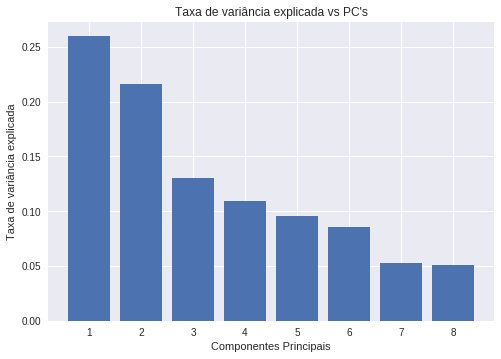

In [39]:
pcs = range(1,len(v_dec)+1)

plt.title("Taxa de variância explicada vs PC's")

plt.xlabel('Componentes Principais')

plt.ylabel('Taxa de variância explicada')

plt.bar(pcs, tx_var)

plt.show()

### Taxa de Variância Cumulativa ###

In [36]:
tx_var_cumul = np.cumsum(w_dec)/np.sum(w_dec)

print(tx_var_cumul)

[0.25987168 0.47598664 0.60614917 0.7156889  0.81111769 0.89658912
 0.94943958 1.        ]


Cumulative proportion of variance explained vector: 
[0.25987168 0.47598664 0.60614917 0.7156889  0.81111769 0.89658912
 0.94943958 1.        ]


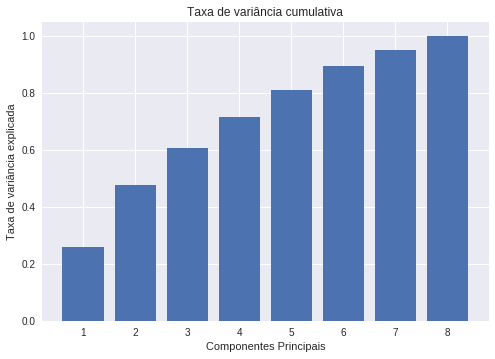

In [40]:
print("Cumulative proportion of variance explained vector: \n%s" %tx_var_cumul)

num_comp = range(1,len(v_dec)+1)

plt.title("Taxa de variância cumulativa")

plt.xlabel('Componentes Principais')

plt.ylabel('Taxa de variância explicada')

plt.bar(num_comp, tx_var_cumul)

plt.show()

A taxa de variância cumulativa nos mostra por exemplo que os 2 primeiros valores nos fornecem uma taxa de 47% de representatividade, os 3 primeiros 60%, os 4 primeiros de 71% e assim por diantes. 

Porém nota-se que para uma boa representação seriam necessários pelo menos 5 ou 6 PCA's reduzindo em 2 ou 3 dimensões a nossa análise.

----------------------------------------------------------------------------------------------------------------------------------------------------------------